In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import numpy as np

In [113]:
reactor_data_w_time = pd.read_csv('/content/drive/MyDrive/polymer_reactor.txt')

##Data Analysis

In [114]:
reactor_data_w_time.iloc[2100:]

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
2100,10/29/2018 11:45,21669.730,0.180,30.892557,76.715584,26112.104,0.110203,80.136581,14.3
2101,10/29/2018 13:45,21104.066,0.179,30.943935,77.123138,29730.547,0.097483,79.830345,13.8
2102,10/29/2018 15:45,20772.168,0.179,31.103821,76.768845,30804.184,0.098374,79.598404,13.5
2103,10/29/2018 17:45,21072.043,0.179,30.873522,76.974831,30674.375,0.085419,79.773842,13.6
2104,10/29/2018 19:45,20988.229,0.179,31.012695,77.105034,28458.432,0.085877,79.899765,13.2
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


In [115]:
#use labels instead of data file tags
reactor_data_w_time = reactor_data_w_time.rename(columns={'Unnamed: 0': 'Time', '513FC31103.pv': 'C3', '513HC31114-5.mv': 'H2R', '513PC31201.pv': 'Pressure', '513LC31202.pv': 'Level', '513FC31409.pv': 'C2', '513FC31114-5.pv': 'Cat', '513TC31220.pv': 'Temp'})

In [116]:
reactor_data_w_time = reactor_data_w_time.dropna()

In [117]:
reactor_data_w_time.isnull().values.any()

False

In [118]:
#drop the time the data point was taken
reactor_data = reactor_data_w_time.drop('Time', axis=1 )

In [119]:
reactor_data.head()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [120]:
reactor_data.shape

(2484, 8)

In [121]:
reactor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2559
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C3        2484 non-null   float64
 1   H2R       2484 non-null   float64
 2   Pressure  2484 non-null   float64
 3   Level     2484 non-null   float64
 4   C2        2484 non-null   float64
 5   Cat       2484 non-null   float64
 6   Temp      2484 non-null   float64
 7   MFR       2484 non-null   float64
dtypes: float64(8)
memory usage: 174.7 KB


In [122]:
np.corrcoef(reactor_data['C3'],reactor_data['H2R'])

array([[ 1.        , -0.03583256],
       [-0.03583256,  1.        ]])

In [123]:
for col1 in reactor_data:
  for col2 in reactor_data:
    print(col1, col2)
    print(np.corrcoef(reactor_data_w_time[col1],reactor_data_w_time[col2]))

C3 C3
[[1. 1.]
 [1. 1.]]
C3 H2R
[[ 1.         -0.03583256]
 [-0.03583256  1.        ]]
C3 Pressure
[[ 1.         -0.24638226]
 [-0.24638226  1.        ]]
C3 Level
[[1.         0.20758953]
 [0.20758953 1.        ]]
C3 C2
[[1.         0.38742925]
 [0.38742925 1.        ]]
C3 Cat
[[1.        0.2799678]
 [0.2799678 1.       ]]
C3 Temp
[[ 1.         -0.15759101]
 [-0.15759101  1.        ]]
C3 MFR
[[ 1.         -0.24798446]
 [-0.24798446  1.        ]]
H2R C3
[[ 1.         -0.03583256]
 [-0.03583256  1.        ]]
H2R H2R
[[1. 1.]
 [1. 1.]]
H2R Pressure
[[1.         0.22157601]
 [0.22157601 1.        ]]
H2R Level
[[1.        0.1044359]
 [0.1044359 1.       ]]
H2R C2
[[1.         0.37574455]
 [0.37574455 1.        ]]
H2R Cat
[[1.         0.22691946]
 [0.22691946 1.        ]]
H2R Temp
[[1.         0.05296717]
 [0.05296717 1.        ]]
H2R MFR
[[1.         0.42643292]
 [0.42643292 1.        ]]
Pressure C3
[[ 1.         -0.24638226]
 [-0.24638226  1.        ]]
Pressure H2R
[[1.         0.22157601]

In [124]:
for col in reactor_data:
  print(col)
  print(np.median(reactor_data[col]))

C3
25364.311500000003
H2R
0.175
Pressure
30.622631
Level
77.4944765
C2
41550.5625
Cat
0.1329714105
Temp
80.0443075
MFR
4.3


In [125]:
reactor_data_w_time['Time'] = pd.to_datetime(reactor_data_w_time['Time'])

In [126]:
reactor_data_w_time['Time'][0]

Timestamp('2018-04-05 19:45:00')

In [127]:
def _range(series):
    return series.max() - series.min()
range_value = reactor_data_w_time['Time'].agg([_range])
range_value

_range   248 days 14:00:00
Name: Time, dtype: timedelta64[ns]

In [128]:
pd.to_datetime('04-05-18')

Timestamp('2018-04-05 00:00:00')

In [129]:
first_month = reactor_data_w_time['Time'] <= pd.to_datetime('04-30-18 23:45:00')


In [130]:
reactor_first_month = reactor_data_w_time[first_month]
np.median(reactor_first_month['MFR'])

4.2

In [131]:
last_month =  reactor_data_w_time['Time'] <= pd.to_datetime('12-10-2018 09:45:00')

In [132]:
reactor_last_month = reactor_data_w_time[last_month]
np.median(reactor_last_month['MFR'])

4.3

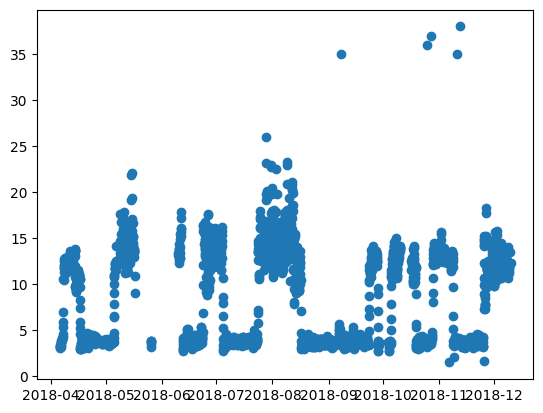

In [133]:
import matplotlib.pyplot as plt
plt.scatter(reactor_data_w_time['Time'], reactor_data_w_time['MFR'])

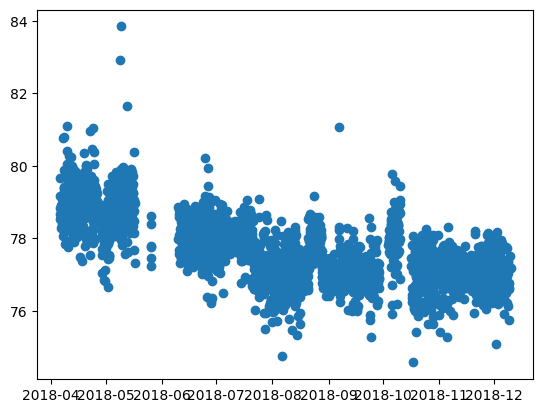

In [134]:

plt.scatter(reactor_data_w_time['Time'], reactor_data_w_time['Level'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a31e481f340>,
 'caps': [<matplotlib.lines.Line2D at 0x7a31e481f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a31e481c910>],
 'medians': [<matplotlib.lines.Line2D at 0x7a31e481fd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a31e483c0a0>],
 'means': []}

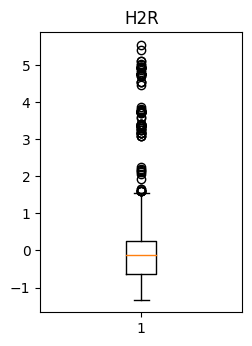

In [162]:

plt.figure(figsize=(12,8))
plt.subplot(2,4,+1)
plt.title('H2R')
plt.boxplot(reactor_data['H2R'])

In [135]:
# import seaborn as sns
# sns.pairplot(reactor_data_w_time)

In [136]:
print(len(reactor_data))
reactor_data = reactor_data[reactor_data['H2R']<0.7]
reactor_data = reactor_data[reactor_data['H2R']>0.01]
reactor_data = reactor_data[reactor_data['C2']<100000]
reactor_data = reactor_data[reactor_data['MFR']<30]
reactor_data = reactor_data[reactor_data['Temp']<83]
print(len(reactor_data))
reactor_data.head()

2484
2450


,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [137]:
reactor_data['lnMFR'] = np.log(reactor_data['MFR'].values)

### Scale Data

Scale data with the Standard Scalar from scikit-learn.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
```

In [138]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(reactor_data)
type(reactor_data)

pandas.core.frame.DataFrame

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [139]:
reactor_data = pd.DataFrame(data,columns=reactor_data.columns)
reactor_data.head()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,lnMFR
0,-0.275813,-0.448905,-0.608709,2.183673,0.738905,0.618674,0.393138,-0.927809,-1.032139
1,0.127196,-0.448905,-0.337724,0.958317,-0.026235,-0.206091,-1.736289,-0.968421,-1.128004
2,0.217202,-0.448905,-0.750264,1.295911,0.249443,0.281795,-1.796108,-0.968421,-1.128004
3,-0.132429,-0.448905,0.548427,1.656195,0.048959,0.318882,-1.512875,-0.988728,-1.178208
4,-0.277378,-0.491991,0.032788,1.115873,-0.188252,-0.378416,-1.491054,-0.948115,-1.079345


In [140]:

reactor_data = reactor_data.sample(frac = 1)

##Neural Network

In [141]:
target = np.array(reactor_data['lnMFR'])

In [142]:
reactor_data.drop(['MFR', 'lnMFR'], axis = 1)

,C3,H2R,Pressure,Level,C2,Cat,Temp
1290,-0.051668,0.183017,-0.702678,-0.590901,-0.020298,0.878998,0.616773
986,0.860864,0.800577,0.924050,-0.576446,0.705879,-0.350834,-0.912336
2365,-1.977004,-0.204753,2.882198,0.148308,-0.483338,-0.069512,2.311993
642,0.954577,-0.290925,-0.616391,0.747681,-0.302794,-0.026175,0.378321
607,0.621581,-0.592524,0.207720,0.698017,-0.300090,0.277034,-0.083431
...,...,...,...,...,...,...,...
1638,-0.525606,-0.779228,-0.548617,-1.018013,-0.640845,-0.228490,0.054331
1095,1.002129,1.059091,0.055044,0.635136,1.696041,0.575010,1.153680
1130,0.410477,1.159624,-0.207968,-1.130085,1.644754,0.553077,2.470011
1294,0.223017,0.197379,-0.262311,-0.656184,0.085284,0.733405,-0.576159


In [143]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(reactor_data, target, test_size = 1/5, shuffle=False)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size = 1/4, shuffle=False)


In [144]:
import keras
import tensorflow as tf

In [145]:
!pip install -q -U keras-tuner
import keras_tuner as kt

In [146]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [172]:
def build_model(hp):
  model = keras.Sequential()
  # model.add(keras.layers.Flatten)
  model.add(keras.layers.Dense(
      hp.Int('unit[0]',21, 100, step = 10), activation = 'linear')
  )
  model.add(keras.layers.Dense(
      hp.Int('unit[1]', 23, 100, step = 10), activation = 'relu')
  )
  model.add(keras.layers.Dense(
      hp.Int('unit[2]', 23, 100, step = 10), activation = 'relu')
  )


  model.add(keras.layers.Dense(1,activation='linear'))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),metrics="mean_squared_error")
  return model

In [160]:
tuner = kt.Hyperband(build_model, objective='mean_squared_error', overwrite=True)

In [161]:
tuner.search(X_train_tr, y_train_tr, epochs=40,validation_data=(X_train_v,y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=15)])

Trial 254 Complete [00h 00m 44s]
mean_squared_error: 6.426165055017918e-05

Best mean_squared_error So Far: 2.8923674108227715e-05
Total elapsed time: 00h 23m 27s


In [163]:
best_hps = tuner.get_best_hyperparameters()
best_hps

In [164]:
hyper_model = tuner.hypermodel.build(best_hps[0])

In [165]:
hyper_model.fit(X_train_tr, y_train_tr, epochs =50, validation_data=(X_train_v, y_train_v), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
46/46 [==============================] - 1s 8ms/step - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 9.5383e-04 - val_mean_squared_error: 9.5383e-04
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 5.2510e-04 - val_mean_squared_error: 5.2510e-04
Epoch 7/50
46/46 [======

In [166]:
hyper_model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 11ms/step - loss: 4.8057e-04 - mean_squared_error: 4.8057e-04


[0.000480574497487396, 0.000480574497487396]

In [169]:
prediction = hyper_model.predict([X_test])

16/16 [==============================] - 0s 6ms/step


In [194]:
print(X_test)


            C3       H2R  Pressure     Level        C2       Cat      Temp  \
1587 -0.788474 -0.491991  0.450778 -0.972594 -0.818209  1.256161 -0.273503   
1407 -0.926114  0.254827 -0.240480 -0.208320 -0.603335  0.298048 -0.012935   
734   0.677382  1.087815  0.681236 -0.071798  1.806823 -0.183180 -0.696084   
717   0.276602  1.016005  1.150162 -0.606496  1.407035  0.609483 -0.208963   
2322 -0.235724 -0.779228 -0.188497  0.100506 -0.163040 -1.147732  0.668482   
...        ...       ...       ...       ...       ...       ...       ...   
1638 -0.525606 -0.779228 -0.548617 -1.018013 -0.640845 -0.228490  0.054331   
1095  1.002129  1.059091  0.055044  0.635136  1.696041  0.575010  1.153680   
1130  0.410477  1.159624 -0.207968 -1.130085  1.644754  0.553077  2.470011   
1294  0.223017  0.197379 -0.262311 -0.656184  0.085284  0.733405 -0.576159   
860   1.220539  0.053760 -0.059532  0.623496  1.459007  0.179738  0.333836   

           MFR     lnMFR  
1587 -0.887197 -0.941755  
1407 -0.9

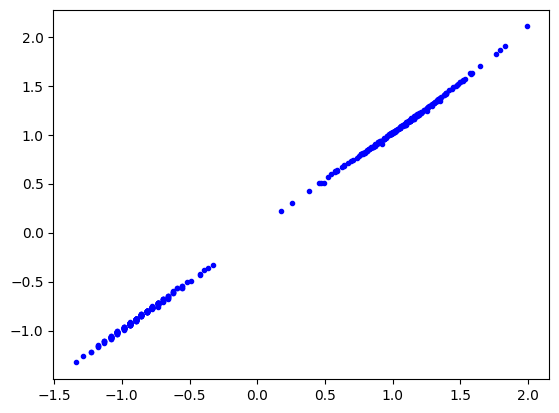

In [198]:
plt.plot(y_test, prediction ,'b.')

##TPOT

In [199]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=cfefdc5af094a01890c52c979b9109e74a257965e05780474159e2783f545058
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
